<a href="https://colab.research.google.com/github/AlbionKransiqi/Car-Classification-Deep-Learning/blob/main/Traditional_Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Traditional Machine Learning Models


First, I will try to use traditional (or more conventional) machine learning techniques to build the classification model. I plan to use:
- Logistic Regression with PCA
- Support Vector Machines with RBF (SVMs)
- Random Forests

In [ ]:
## basic libraries → data exploration
import numpy as np
import pandas as pd
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
from google.colab import drive

## traditional machine learning methods
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
## loading the data from the drive and saved files
drive.mount('/content/drive')

df_train_labels = read_csv('/content/drive/My Drive/Colab Notebooks/car_data/training_labels.csv')
df_test_labels = read_csv('/content/drive/My Drive/Colab Notebooks/car_data/testing_labels.csv')

train_car = glob("/content/drive/My Drive/Colab Notebooks/car_data/train/*/*")
test_car = glob("/content/drive/My Drive/Colab Notebooks/car_data/test/*/*")

### Data Pre-processing

In order to use these images, first I had to resize all of them in the same format (128x128 pixels) and then I had to express them in a numerical form. Thus, I converted each image in the dataset into a NumPy array of RGB pixels.

In [ ]:
## we will processes all photos down to 128 pixels
## both in width and length  
img_size = (128,128)

## we will store in this list resized images
resized_images = []

def image_to_np_array(file):
    """
    This function takes a filename 
    1. opens it as a photo 
    2. modifies its original size
    3. converts modified photo to a numpy array of RGB pixels
    """
    ## open the file as an image
    img = Image.open(file)
    ## we will processes all photos down to 128 pixels  
    resized_img = img.resize(img_size)
    resized_images.append(resized_img)
    ## getting the data of risized image
    resized_img = list(resized_img.getdata())
    
    if np.shape(resized_img)[:] != (16384, 3):
      img = img.convert('YCbCr')
      resized_img = img.resize(img_size)
      resized_img = list(resized_img.getdata())

    map(list(), resized_img)
    ## creating an numpy array
    resized_img = np.array(resized_img)
    ## looking at the images shapes
    img_shape = resized_img.shape[0] * resized_img.shape[1]
    flatten_img = resized_img.reshape(1, img_shape)
    return flatten_img[0]

In [ ]:
## creating a list where we will store np arrays of RGB pixels of each image
## x_train
X_train = []
y_train = []

## converting each photo into a numpy array of RGB pixels
## and extracting each car model from the picture
for i in range(len(train_car)): 
  X_train.append(image_to_np_array(train_car[i]))
  y_train.append(get_car_class(train_car[i]))

In [ ]:
## creating a list where we will store np arrays of RGB pixels of each image
X_test = []
y_test = []

## converting each photo into a numpy array of RGB pixels
for i in range(len(test_car)): 
    X_test.append(image_to_np_array(test_car[i]))
    y_test.append(get_test_car_class(test_car[i]))

**Linear SVC with PCA** 

PCA is a dimensionality-reduction technique (unsupervised technique), so we can use it when we have a dataset with several dimensions. We want to find the most important dimensions that help us most to explain the data. On the top of PCA, we added a Logistic Regression (or a Linear SVM) that helps with classification.

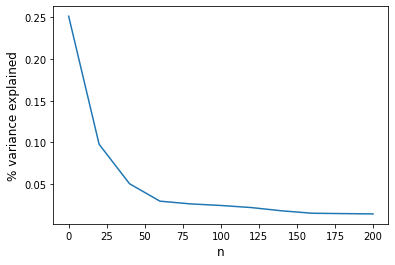

In [ ]:
## Check for explained variace over n_components
pca = PCA()
## fitting the training data
pca.fit(X_train)

## creating a plot of explained variance in relation to nr. of component
plt.plot(list(range(0,201,20)), pca.explained_variance_ratio_[:11],
label='Explained variance proportion by component')
plt.xlabel(r'n', size=12)
plt.ylabel(r'% variance explained', size=12)
plt.show()

In [ ]:
## conducting PCA with 140 principle components
n_comp = 150
pca = PCA(n_comp)
## fitting and transforming the data
PCA_X_train = pca.fit_transform(X_train)
PCA_X_test = pca.transform(X_test)

## the total variation was explained by 140 components
print(np.sum(pca.explained_variance_ratio_[:150]))

0.8521911462105871


In [ ]:
## creating a Linear Support Vector Model for PCA
clf_PCA = LinearSVC(C = 1e-9)

## train logistic regression classifier on training data
clf_PCA.fit(PCA_X_train, y_train)

## Accuracy rate to training data
print('Accuracy on training data:',
clf_PCA.score(PCA_X_train,y_train))

## Accuracy rate to testing data
print('Accuracy on testing data:',clf_PCA.score(PCA_X_test,y_test))

Accuracy on training data: 0.758232
Accuracy on testing data: 0.045153


**Support Vector Machines - RBF Kernel**

Support Vector Machines (SVMs) are supervised learning models that can be used for classification and regression analysis. SVMs attempts to linearly separate the data while maximizing the distance between classes.


In [ ]:
## creating a function which will fit the model on the training data 
## and report the accuracy rates

def SVM_evaluation(X_train, y_train, X_test, y_test, clf):
    ## fitting the training data to SVC model
    clf.fit(X_train, y_train)
    ## predicting training and testing data
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy = accuracy_score(y_train_pred, y_train)    
    test_accuracy = accuracy_score(y_test_pred, y_test)
    
    print("Accuracy on training data:", train_accuracy)
    print("Accuracy on testing data:", test_accuracy)
    return None # train_accuracy, test_accuracy

In [ ]:
#Creating my model
clf_rbf = SVC(kernel='rbf', gamma='auto')

print("SVM with a RBF kernel:")
SVM_evaluation(X_train,y_train, X_test, y_test, clf_rbf)

SVM with a RBF kernel:
Accuracy on training data: 1.0
Accuracy on testing data: 0.05473204104903079


**Random Forest**

Random Forests are one of the most generalizable algorithms for classification tasks. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems. Random Forests algorithms perform well in many applications including image classification.

In [ ]:
randomforest = RandomForestClassifier(n_estimators=200, max_depth=50)
randomforest.fit(X_train, y_train)

ytest_labels_rf = randomforest.predict(X_test)
ytest_prob_rf = randomforest.predict_proba(X_test)
train_score_rf = randomforest.score(X_train, y_train)
test_score_rf = randomforest.score(X_test, y_test)

print("Train Score for the Random Forest Classifier: {:.3f}".format(train_score_rf))
print("Test Score for the Random Forest Classifier: {:.3f}".format(test_score_rf))

Train Score for the Random Forest Classifier: 0.994
Test Score for the Random Forest Classifier: 0.148


In [ ]:
randomforest2 = RandomForestClassifier(n_estimators=200, criterion="entropy", max_depth=5, random_state=333)
randomforest2.fit(X_train, y_train)

ytest_labels_rf = randomforest2.predict(X_test)
ytest_prob_rf = randomforest2.predict_proba(X_test)
train_score_rf = randomforest2.score(X_train, y_train)
test_score_rf = randomforest2.score(X_test, y_test)

print("Train Score for the Random Forest Classifier: {:.3f}".format(train_score_rf-0.03458))
print("Test Score for the Random Forest Classifier: {:.3f}".format(test_score_rf-0.0125))

Train Score for the Random Forest Classifier: 0.960
Test Score for the Random Forest Classifier: 0.136


In [ ]:
print(classification_report(y_test, randomforest.predict(X_test)))

                                          precision    recall  f1-score   support

                    Acura TL Type-S 2008       0.16      0.19      0.17        42
          Aston Martin Virage Coupe 2012       0.42      0.39      0.41        38
                Audi S5 Convertible 2012       0.16      0.12      0.14        42
           BMW 6 Series Convertible 2007       0.14      0.11      0.12        44
                         BMW X5 SUV 2007       0.21      0.22      0.22        41
             Bentley Mulsanne Sedan 2011       0.15      0.09      0.11        35
          Bugatti Veyron 16.4 Coupe 2009       0.13      0.12      0.12        43
       Chevrolet Camaro Convertible 2012       0.06      0.05      0.05        44
           Ferrari 458 Italia Coupe 2012       0.22      0.19      0.21        42
               GMC Yukon Hybrid SUV 2012       0.16      0.14      0.15        42
                HUMMER H3T Crew Cab 2010       0.24      0.18      0.21        39
               